In [553]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


In [554]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [555]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [556]:
null_Columns = ['keyword', 'location']

train[null_Columns].isnull().sum().values

array([  61, 2533], dtype=int64)

## EDAs

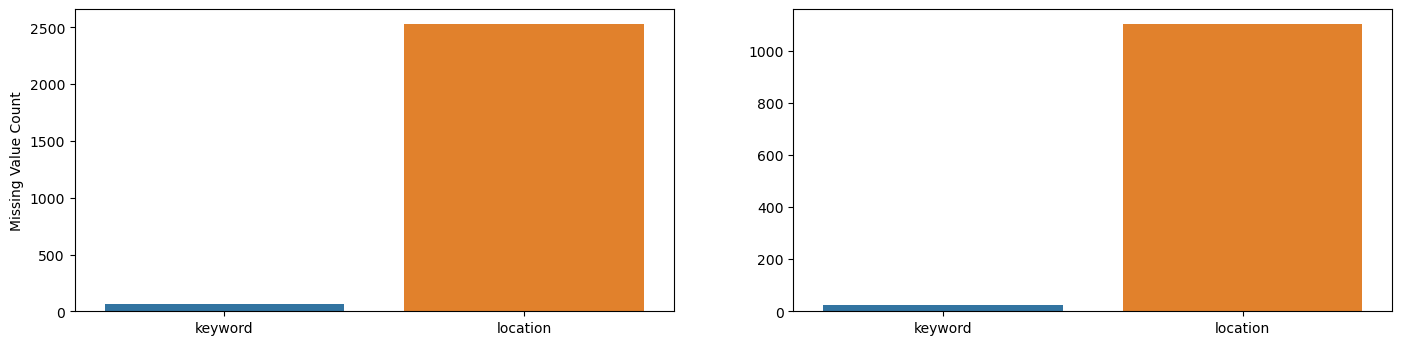

In [557]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
sns.barplot(x = ['keyword', 'location'], y = train[null_Columns].isnull().sum().values, ax=axes[0])
sns.barplot(x = ['keyword', 'location'], y = test[null_Columns].isnull().sum().values, ax=axes[1]);
axes[0].set_ylabel('Missing Value Count');


## Meta Features
Distributions of meta features in classes and datasets can be helpful to identify disaster tweets. It looks like disaster tweets are written in a more formal way with longer words compared to non-disaster tweets because most of them are coming from news agencies. Non-disaster tweets have more typos than disaster tweets because they are coming from individual users. The meta features used for the analysis are;

    word_count number of words in text
    unique_word_count number of unique words in text
    stop_word_count number of stop words in text
    url_count number of urls in text
    mean_word_length average character count in words
    char_count number of characters in text
    punctuation_count number of punctuations in text
    hashtag_count number of hashtags (#) in text
    mention_count number of mentions (@) in text

In [558]:
import string
from wordcloud import STOPWORDS


In [559]:
# word_count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test['stop_word_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
train['url_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test['url_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))

# punctuation_count
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test['punctuation_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
train['hashtag_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train['mention_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

C:\Users\91957\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91957\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91957\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\91957\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91957\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91957\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

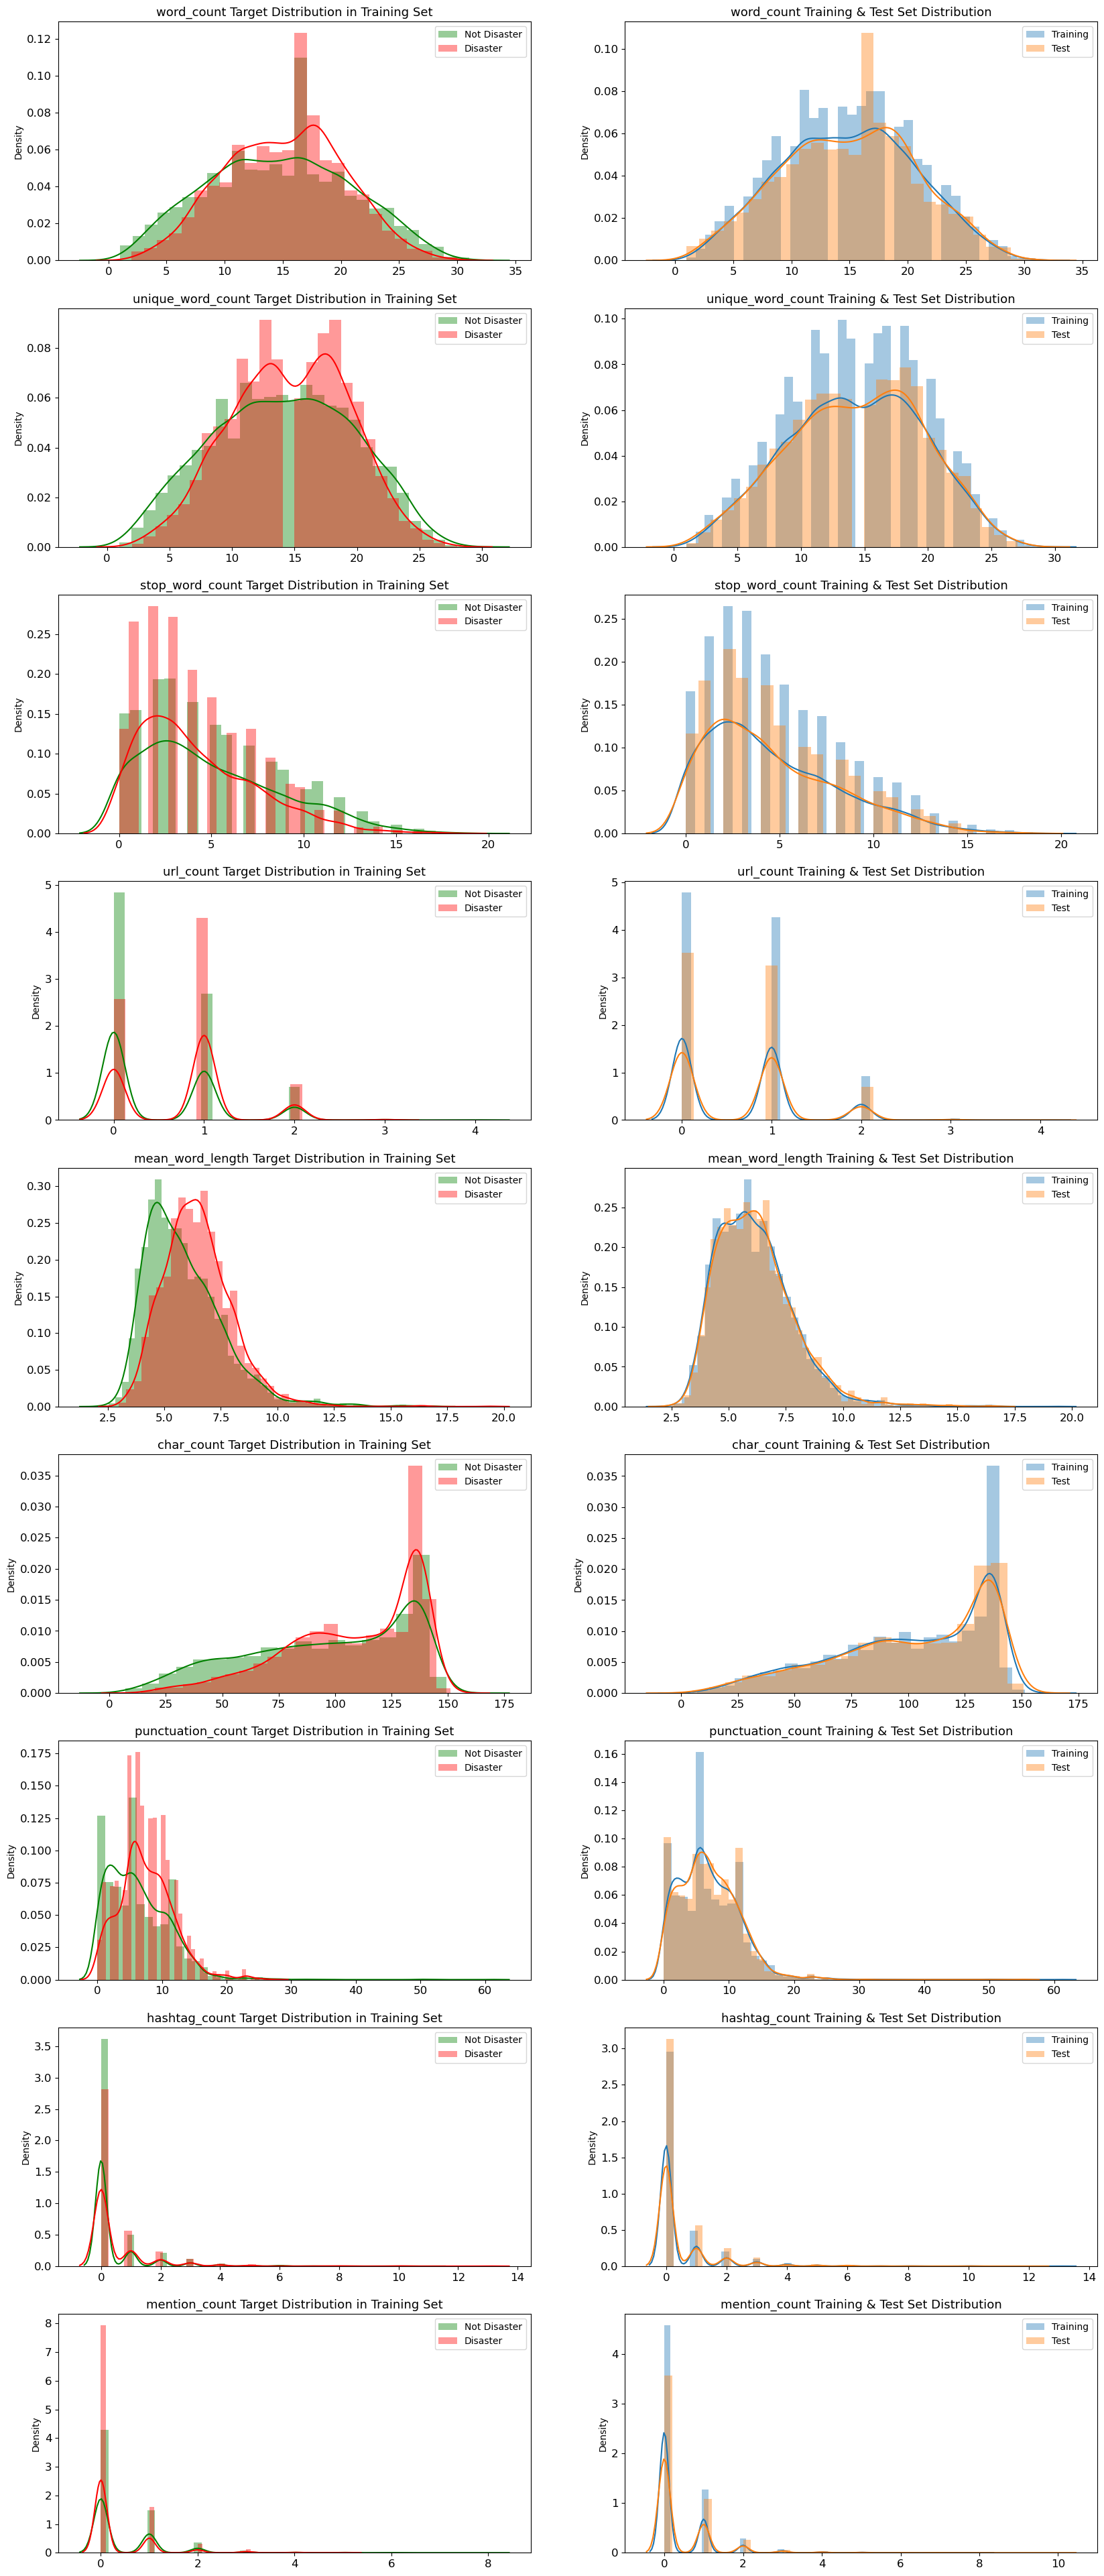

In [560]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = train['target'] == 1
fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)
for i, feature in enumerate(METAFEATURES):
    sns.distplot(train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(train[feature], label='Training', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show();

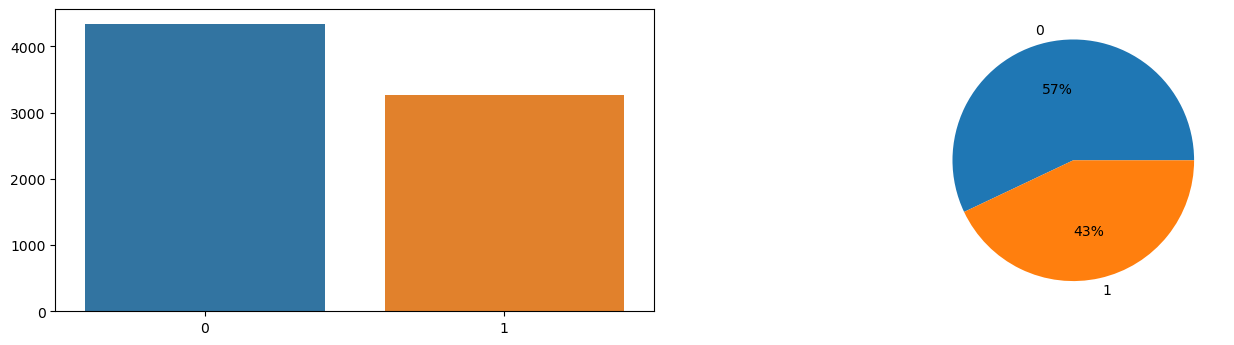

In [562]:
### Checking for Imbalance in Target Variable

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.pie(train['target'].value_counts(), labels=train['target'].value_counts().index, autopct='%.0f%%', )
sns.barplot(x = train['target'].value_counts().index, y = train['target'].value_counts().values, ax=axes[0]);

In [563]:
## Removing non-english words
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\91957\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [564]:
sent = "Io andiamo to the beach with my amico."
sent = " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())
sent

'Io to the beach with my .'

## Checking for most common words in disaster tweets and non disaster tweets

In [565]:
DISASTER_TWEETS = train['target'] == 1
NON_DISASTER_TWEETS = train['target'] == 0

In [567]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 50

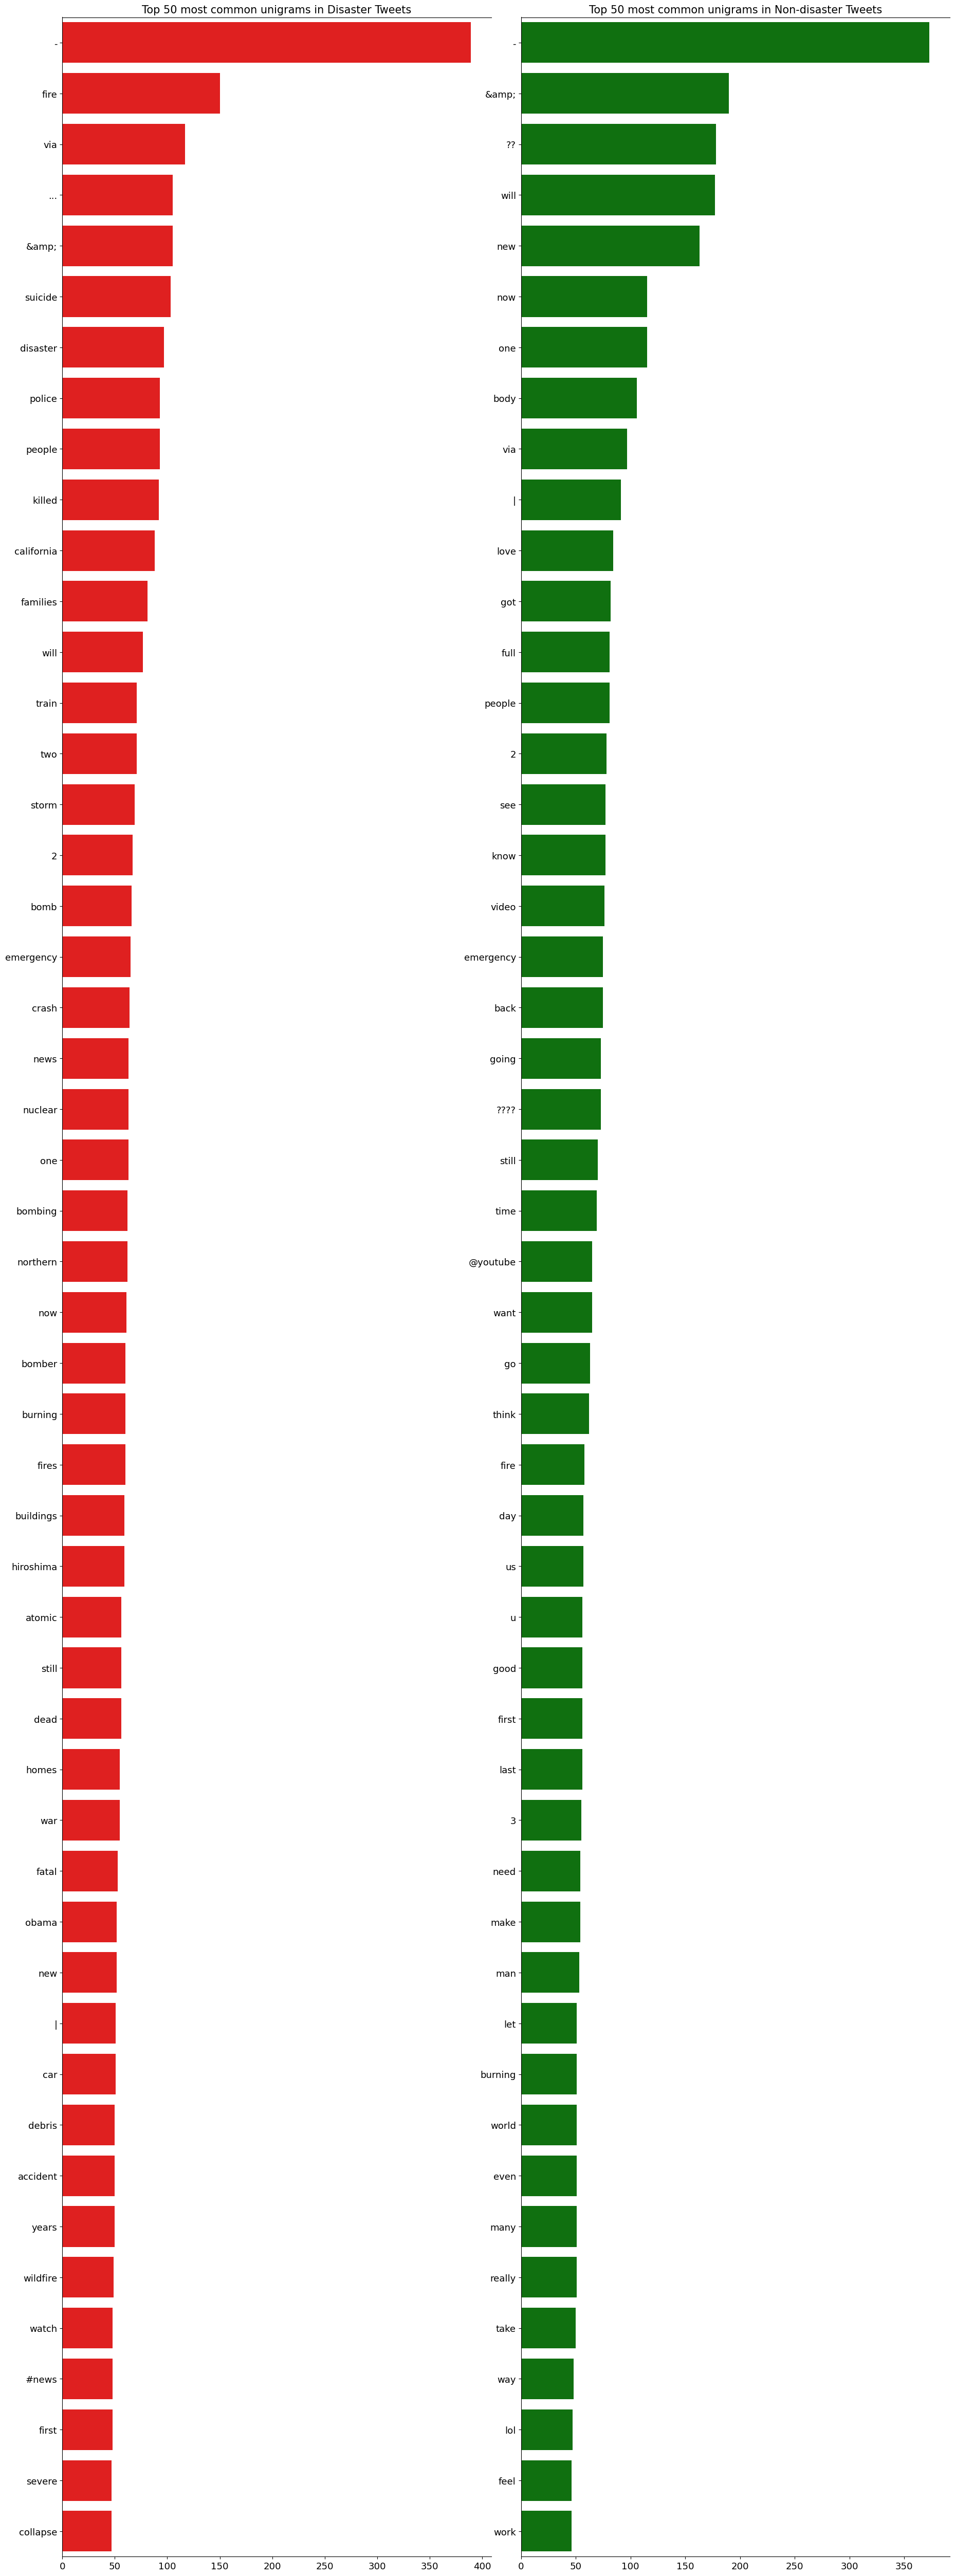

In [568]:
# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [583]:
import re

def text_cleaning(text, n_gram=1):
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)  ## removing urls
    nopunc =[char for char in tweet if char not in string.punctuation]
    nopunc = "".join(nopunc)
    token = [token for token in nopunc.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


In [584]:
from sklearn.feature_extraction.text import CountVectorizer ## used to count the word
word_count = CountVectorizer(analyzer= text_cleaning).fit(train['text'])
# word_count = CountVectorizer(analyzer= remove_punctuations).fit(train['text'])
word_count.vocabulary_

{'deeds': 4730,
 'reason': 13274,
 'earthquake': 5532,
 'may': 10347,
 'allah': 1303,
 'forgive': 6677,
 'us': 17059,
 'forest': 6666,
 'fire': 6460,
 'near': 11205,
 'la': 9399,
 'ronge': 13839,
 'sask': 14132,
 'canada': 3154,
 'residents': 13551,
 'asked': 1767,
 'shelter': 14533,
 'place': 12441,
 'notified': 11478,
 'officers': 11653,
 'evacuation': 5973,
 'orders': 11855,
 'expected': 6068,
 '13000': 278,
 'people': 12235,
 'receive': 13296,
 'wildfires': 17702,
 'california': 3106,
 'got': 7239,
 'sent': 14391,
 'photo': 12335,
 'ruby': 13933,
 'alaska': 1250,
 'smoke': 14901,
 'pours': 12639,
 'school': 14217,
 'rockyfire': 13792,
 'update': 17013,
 'hwy': 8143,
 '20': 398,
 'closed': 3743,
 'directions': 5050,
 'due': 5452,
 'lake': 9422,
 'county': 4205,
 'cafire': 3075,
 'flood': 6560,
 'disaster': 5072,
 'heavy': 7707,
 'rain': 13130,
 'causes': 3334,
 'flash': 6523,
 'flooding': 6564,
 'streets': 15482,
 'manitou': 10185,
 'colorado': 3881,
 'springs': 15220,
 'areas': 163

In [587]:
tdm = word_count.transform(train.text)

In [588]:
tdm.shape

(7613, 18336)

### Lets do the sampling and build model

In [589]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(tdm, train.target)

## Naive Bayes Algorithm

In [591]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [592]:
NB.fit(x_train, y_train)

MultinomialNB()

In [593]:
pred_test = NB.predict(x_test)

In [597]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
tab1 = confusion_matrix(y_test, pred_test)
tab1

array([[896, 181],
       [247, 580]], dtype=int64)

In [595]:
accuracy_score(y_test, pred_test)

0.7752100840336135

In [598]:
f1_score(y_test, pred_test)

0.730478589420655

# Using Neural Networks

In [640]:
NN_train = pd.read_csv('train.csv')
NN_test = pd.read_csv('test.csv')

In [641]:
NN_train.drop(['id'], axis=1, inplace=True)

In [642]:
NN_train.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [643]:
NN_train1 = NN_train

In [644]:
NN_train = NN_train.fillna(' ')

In [645]:
NN_train['Message'] = NN_train['location'].apply(str)+ ' ' + NN_train['text'].apply(str) +  ' ' + NN_train['keyword'].apply(str)


In [646]:
NN_train.drop(['location', 'text', 'keyword' ], axis=1, inplace=True)

In [647]:
NN_train.head()

,target,Message
0,1,Our Deeds are the Reason of this #earthquake...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' ar...
3,1,"13,000 people receive #wildfires evacuation ..."
4,1,Just got sent this photo from Ruby #Alaska a...


In [648]:
import re

def text_cleaning_for_NN(text, n_gram=1):
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)  ## removing urls
    nopunc =[char for char in tweet if char not in string.punctuation]
    nopunc = "".join(nopunc)
    token = [token for token in nopunc.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


In [649]:
NN_train = NN_train.rename(columns={'target': 'Label'})

In [650]:
x = NN_train['Message']
y = NN_train['Label']

In [651]:
from sklearn.model_selection import train_test_split
NN_x_train ,NN_x_test, NN_y_train, NN_y_test = train_test_split(x,y, test_size=0.2)

In [652]:
print(NN_x_train.shape)
print(NN_x_test.shape)
print(NN_y_train.shape)
print(NN_y_test.shape)

(6090,)
(1523,)
(6090,)
(1523,)


In [653]:
from tensorflow.keras.utils import to_categorical
NN_y_train = to_categorical(NN_y_train) ## One Hot Encoding and convert in array format

In [654]:
NN_y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [655]:
max_num_words = 10000 # hyper parameter ( max number of word to be taken from the entire training corpus)
seq_len       = 70   #  hyper parameter ( how many words to be taken from each document / row)
embedding_size  = 150 # hyper parameter ( vector length of each word i.e how many matching words you need for 1 word)

#  we are defining the variables above


In [656]:
from keras.preprocessing.text     import Tokenizer     #
from keras_preprocessing.sequence import pad_sequences  # all samples for the same size ..it will add the zeros 


# Neural nets can not run on non numeric data we need to create id for each word so we need tokeninzer


In [657]:
tokenizer = Tokenizer(num_words=max_num_words, analyzer=text_cleaning_for_NN)
tokenizer.fit_on_texts(NN_train.Message)

In [658]:
NN_x_train = tokenizer.texts_to_sequences(NN_x_train)
NN_x_train = pad_sequences(NN_x_train, maxlen=seq_len)

In [659]:
NN_x_train

array([[   0,    0,    0, ...,   59,  224,  170],
       [   0,    0,    0, ..., 5817,  469,  288],
       [   0,    0,    0, ...,  946, 1991,  244],
       ...,
       [   0,    0,    0, ...,  839,  194,  194],
       [   0,    0,    0, ...,    7,   60,  252],
       [   0,    0,    0, ..., 5588,    7,   82]])

In [660]:
NN_x_test = tokenizer.texts_to_sequences(NN_x_test)
NN_x_test = pad_sequences(NN_x_test, maxlen=seq_len)

In [661]:
NN_x_test

array([[   0,    0,    0, ..., 2784, 1689,  109],
       [   0,    0,    0, ..., 6553,   35,  621],
       [   0,    0,    0, ..., 1064, 1080,  198],
       ...,
       [   0,    0,    0, ...,  440,  859,   42],
       [   0,    0,    0, ...,    2,  172,  172],
       [   0,    0,    0, ...,  601, 1717,  621]])

In [662]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.layers import Embedding, LSTM


In [663]:
model = Sequential()
model.add(Embedding(input_dim=max_num_words, input_length=seq_len, output_dim = embedding_size))

In [664]:
model.add(LSTM(5))
model.add(Dense(2, activation='softmax'))

In [665]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [666]:
model1 = model.fit(NN_x_train, NN_y_train, validation_split=0.2, epochs=5)

Epoch 1/5
153/153 [==============================] - 6s 33ms/step - loss: 0.5857 - accuracy: 0.7299 - val_loss: 0.4818 - val_accuracy: 0.7931
Epoch 2/5
153/153 [==============================] - 5s 30ms/step - loss: 0.3595 - accuracy: 0.8580 - val_loss: 0.4926 - val_accuracy: 0.7898
Epoch 3/5
153/153 [==============================] - 5s 31ms/step - loss: 0.2221 - accuracy: 0.9216 - val_loss: 0.5891 - val_accuracy: 0.7709
Epoch 4/5
153/153 [==============================] - 5s 31ms/step - loss: 0.1474 - accuracy: 0.9491 - val_loss: 0.6830 - val_accuracy: 0.7529
Epoch 5/5
153/153 [==============================] - 5s 31ms/step - loss: 0.1021 - accuracy: 0.9670 - val_loss: 0.7883 - val_accuracy: 0.7455


In [667]:
pred_test_proba = model.predict(NN_x_test)

48/48 [==============================] - 0s 4ms/step


In [668]:
pred_test = np.argmax(pred_test_proba, axis=1)

In [669]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(NN_y_test, pred_test))
confusion_matrix(NN_y_test, pred_test)

0.7721602101116218


array([[722, 168],
       [179, 454]], dtype=int64)

In [670]:
f1_score(NN_y_test, pred_test)

0.7235059760956176

In [347]:
## Test Data
test = pd.read_csv('test.csv')

In [348]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [444]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [445]:
test.shape

(3263, 4)